# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [5]:
X = titanic[['Pclass', 'Parch']]
y = titanic['Survived']

## Step 3: Split the data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [7]:
#import model

from sklearn.linear_model import LogisticRegression

# instatiate the model

model = LogisticRegression()

# fit the model

model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 5: Make predictions on the testing set and calculate the accuracy

In [10]:
# class predictions (not predicted probabilities)
y_pred = model.predict(X_test)

In [42]:
# calculate classification accuracy
from sklearn import metrics

# accuracy

metrics.accuracy_score(y_test, y_pred)

0.7130044843049327

In [43]:
#classification report
clas_rep = metrics.classification_report(y_test, y_pred)
print(clas_rep)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       134
           1       0.68      0.53      0.59        89

    accuracy                           0.71       223
   macro avg       0.70      0.68      0.69       223
weighted avg       0.71      0.71      0.70       223



## Step 6: Compare your testing accuracy to the null accuracy

In [19]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [45]:
#majority class probablity

null_probability = 549/(549+342)
null_probability

0.6161616161616161

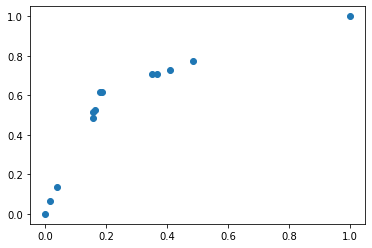

In [57]:
y_pred_prob = model.predict_proba(X_test)[:,1]

# roc curve

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr,tpr, 'o')

In [58]:
# AUC

metrics.roc_auc_score(y_test, y_pred_prob)

0.7215747107160825

In [56]:
ls=list(zip(fpr,tpr,threshold))
[x for x in ls]

[(0.0, 0.0, 1.7293351813129876),
 (0.014925373134328358, 0.06741573033707865, 0.7293351813129876),
 (0.03731343283582089, 0.1348314606741573, 0.6789948684265195),
 (0.15671641791044777, 0.48314606741573035, 0.6241171902095749),
 (0.15671641791044777, 0.5168539325842697, 0.5338990422657864),
 (0.16417910447761194, 0.5280898876404494, 0.5016609924128316),
 (0.1791044776119403, 0.6179775280898876, 0.47345218456458293),
 (0.1865671641791045, 0.6179775280898876, 0.44140750298043246),
 (0.35074626865671643, 0.7078651685393258, 0.4137736374477359),
 (0.3656716417910448, 0.7078651685393258, 0.38283142530938885),
 (0.41044776119402987, 0.7303370786516854, 0.32747156247314185),
 (0.48507462686567165, 0.7752808988764045, 0.2765301729132204),
 (1.0, 1.0, 0.230793760455061)]

# Confusion matrix of Titanic predictions (Bonus Advanced Material)

In [24]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[112  22]
 [ 42  47]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [29]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 47
True Negatives: 112
False Positives: 22
False Negatives: 42


In [31]:
# calculate the sensitivity
print(TP / float(TP + FN))
print(44 / float(44 + 51))

0.5280898876404494
0.4631578947368421


In [33]:
# calculate the specificity
print(TN / float(TN + FP))
print(105 / float(105 + 23))

0.835820895522388
0.8203125


In [36]:
# store the predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

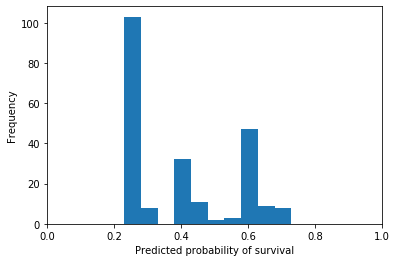

In [37]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

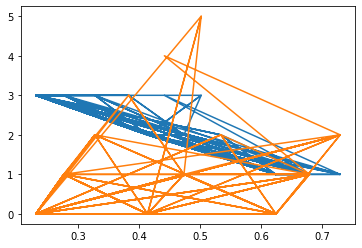

In [38]:
plt.plot(y_pred_prob, X_test)

In [16]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [17]:
# old confusion matrix
print confusion

[[105  23]
 [ 51  44]]


In [18]:
# new confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[72 56]
 [32 63]]


In [19]:
# new sensitivity (higher than before)
print 63 / float(63 + 32)

0.663157894737


In [20]:
# new specificity (lower than before)
print 72 / float(72 + 56)

0.5625
